In [5]:
import numpy as np


1)

In [6]:
a = np.diag(np.arange(1, 5),-1)
print (a)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


2)

In [16]:
a = np.random.random((10, 3))
a, a[range(10), np.abs(a - 0.5).argmin(axis=1)]


(array([[0.05531218, 0.16289746, 0.39580035],
        [0.87265794, 0.2610171 , 0.83924087],
        [0.32578536, 0.74296166, 0.80807634],
        [0.14851434, 0.61530895, 0.49776   ],
        [0.62552359, 0.5222062 , 0.99083763],
        [0.32290893, 0.57489263, 0.59762279],
        [0.65416918, 0.23014367, 0.18383458],
        [0.10147845, 0.42385458, 0.88361671],
        [0.92800765, 0.85117714, 0.86319698],
        [0.49991733, 0.71300898, 0.071829  ]]),
 array([0.39580035, 0.2610171 , 0.32578536, 0.49776   , 0.5222062 ,
        0.57489263, 0.65416918, 0.42385458, 0.85117714, 0.49991733]))

3)

In [18]:
a = np.random.random((6, 6))
a, [np.sum(a, axis = 1) / np.max(a, axis = 0)]

(array([[0.9487332 , 0.05899687, 0.71267166, 0.63531077, 0.0696269 ,
         0.11884514],
        [0.4404027 , 0.56868382, 0.72802972, 0.27085626, 0.06252732,
         0.62683577],
        [0.81085126, 0.90787238, 0.0588974 , 0.99822799, 0.43636947,
         0.02837439],
        [0.07455   , 0.89489545, 0.75607019, 0.29562998, 0.24771009,
         0.54291673],
        [0.49412646, 0.62101511, 0.43964051, 0.53085957, 0.76306717,
         0.86810186],
        [0.04499355, 0.97340588, 0.33053737, 0.66556679, 0.18832761,
         0.55356655]]),
 [array([2.6816649 , 2.77102867, 4.28610059, 2.81676377, 4.8708827 ,
         3.17520081])])

4)

In [21]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
np.max(x[1:] [(x == 0)[:-1]])

5

5)

In [26]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x + np.hstack((np.bincount(i), np.zeros(10-len(np.bincount(i)))))


array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

6)

In [29]:
a = np.random.random((20))
a, np.around(a)

(array([0.20123053, 0.06074627, 0.75522045, 0.20124102, 0.35982412,
        0.62347934, 0.48773945, 0.9449801 , 0.63869519, 0.75351428,
        0.4908402 , 0.15624148, 0.96158178, 0.80393176, 0.31946156,
        0.58765648, 0.08172492, 0.63916845, 0.98961112, 0.35178858]),
 array([0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 1., 0.]))

In [32]:
a = np.random.random((20))*10
a, (a + 0.5)//1

(array([9.30231171, 0.64861642, 5.14933774, 6.5391578 , 9.46640924,
        3.74357664, 1.79396932, 7.61854467, 2.56130452, 6.75705055,
        3.84918237, 2.17687647, 1.55668196, 3.06516858, 9.71690033,
        7.56752044, 7.02153616, 3.36668622, 7.28501794, 0.40188182]),
 array([ 9.,  1.,  5.,  7.,  9.,  4.,  2.,  8.,  3.,  7.,  4.,  2.,  2.,
         3., 10.,  8.,  7.,  3.,  7.,  0.]))

7 и 8(kNN)

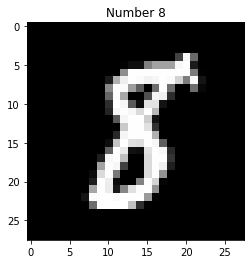

In [34]:
from sklearn.datasets import fetch_openml

#Загрузка может занять около минуты
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)





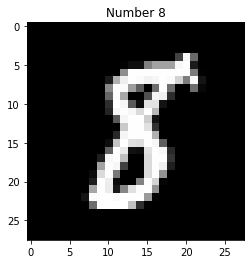

In [35]:
import matplotlib.pyplot as plt

i = 125
plt.imshow(images[i].reshape(28, 28), cmap='Greys_r')
plt.title('Number ' + labels[i])
plt.show()

In [42]:
train_size = 1000
train_images = images[:train_size]
train_labels = labels[:train_size]

test_size = 100
test_images = images[-test_size:]
test_labels = labels[-test_size:]



In [66]:
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

def kNN(train_X, train_Y, test_X, k):
    
    dist = cdist(test_X, train_X)
    nearest = np.argsort(dist)[:, :k] 
    classes_of_nearest = train_Y[nearest]
    all_classes = np.unique(train_Y)
    result = np.concatenate([(classes_of_nearest == i).sum(axis = 1, keepdims = True) for i in all_classes], axis = 1)
    result = result.argmax(axis = 1)

    return all_classes[result]

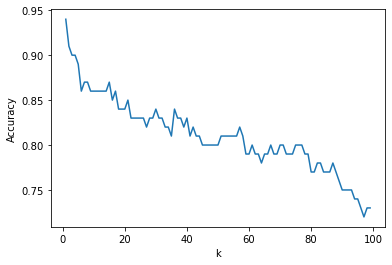

In [72]:
K = list(range(1, 100))
accur = []
for k_ in K:
    test = kNN(train_images, train_labels, test_images, k = k_)
    accur.append(accuracy_score(test_labels, test))
plt.plot(K, accur)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()